**Корректность проверена на Python 3.6:**
+ numpy 1.15.4
+ matplotlib 3.0.2
+ sklearn 0.20.2

# Sklearn

## sklearn.linear_model

In [2]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Линейная регрессия

#### Генерация данных

In [4]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)

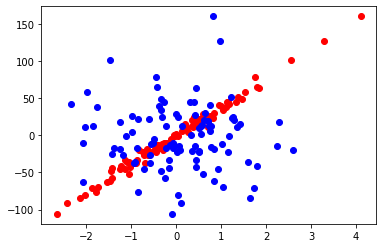

In [5]:
pylab.scatter(data[:,0], target, color = 'r')
pylab.scatter(data[:,1], target, color = 'b')

In [9]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data, target,  
                                                                                     test_size = 0.3)

#### LinearRegression

In [6]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [7]:
print(test_labels)

[  0.34799656  24.82763821  14.76930132  -1.42235396 -22.64686884
  39.70663436 -12.98848753 -35.32062686  64.19559505 -15.01435792
  19.66406455  49.41686419  11.74073026 -36.44717565 -91.477377
  34.35183007  20.87713077 126.64909941  28.15553021  23.87701013
 -27.02798161 -21.48288019 -57.46293828 101.14760598  18.17188553
  44.41658249  25.7124082   22.2276832   12.67156468  25.24428409]


In [8]:
print(predictions)

[ -1.95177889  30.89553873   8.07479087  -0.66113641 -17.80420507
  37.66590431 -16.84382167 -41.98276654  70.2994338   -9.65647357
  26.59542662  55.68421782  14.44692292 -41.89190577 -94.29265433
  38.9543319   13.57393037 126.22341879  22.5385805   31.86962242
 -25.87589586 -24.75507327 -55.39489366  96.69525463  18.00017451
  44.3255138   27.73904101  18.19870417  13.89746305  14.45747606]


In [9]:
metrics.mean_absolute_error(test_labels, predictions)

4.135587604659259

In [10]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring = 'neg_mean_absolute_error', 
                                                  cv = 10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: -4.070071498779695, std: 1.0737104492890204


In [11]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [12]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring=scorer, 
                                                  cv = 10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 4.070071498779695, std: 1.0737104492890204


In [13]:
coef

array([38.07925837,  0.        ])

In [14]:
linear_regressor.coef_

array([38.49968213,  0.59330999])

In [15]:
# в лекции не указано, что в уравнении обученной модели также участвует свободный член
linear_regressor.intercept_

-0.6217583364674848

In [16]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [17]:
print("y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_))

y = 38.50*x1 + 0.59*x2 + -0.62


#### Lasso

In [18]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [19]:
lasso_scoring = model_selection.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 4.154478246666397, std: 1.0170354384993354


In [20]:
print(lasso_regressor.coef_)

[37.60907875  0.        ]


In [21]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [22]:
print("y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1])):

y = 37.61*x1 + 0.00*x2
